In [17]:
import matplotlib.pyplot as plt
import numpy as np
data=np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')

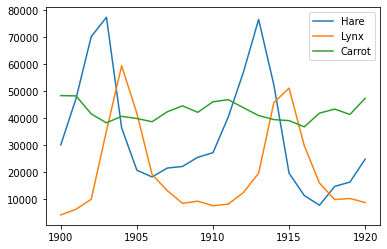

In [2]:
#номер 1
years = data[:,0]
plt.plot(years,data[:,1], label='Hare')
plt.plot(years,data[:,2], label='Lynx')
plt.plot(years,data[:,3], label='Carrot')
plt.legend()
plt.xticks(years[::5])
plt.show()

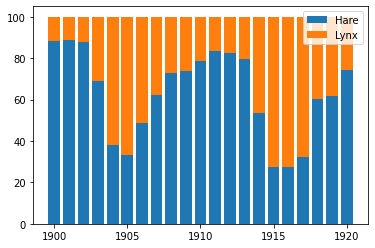

In [3]:
#номер 2
years = data[:,0]
plt.bar(years,100*data[:,1]/(data[:,1]+data[:,2]), label='Hare')
plt.bar(years,100*data[:,2]/(data[:,1]+data[:,2]), label='Lynx' , bottom = 100*data[:,1]/(data[:,1]+data[:,2]))
plt.legend()
plt.xticks(years[::5])
plt.show()

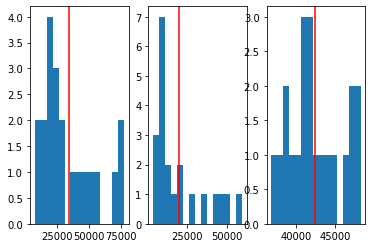

In [4]:
#задача 3
fig, ax = plt.subplots(1, 3)

ax[0].hist(data[:,1], bins = 15)
ax[0].axvline(data[:,1].mean(), c = "r")

ax[1].hist(data[:,2], bins = 15)
ax[1].axvline(data[:,2].mean(), c = "r")

ax[2].hist(data[:,3], bins = 15)
ax[2].axvline(data[:,3].mean(), c = "r")
plt.show()


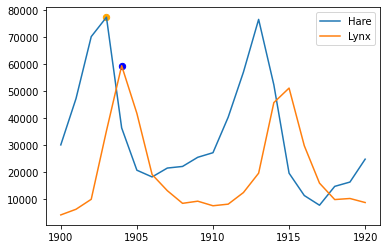

In [5]:
#задача 4
years = data[:,0]
hare = data[:,1]
lynx = data[:,2]
mask1 = hare == max(hare)
mask2 = lynx == max(lynx)
plt.plot(years,hare, label='Hare')
plt.plot(years,lynx, label='Lynx')
plt.scatter(years[mask1],hare[mask1], color='orange', s=40, marker='o')
plt.scatter(years[mask2],lynx[mask2], color='blue', s=40, marker='o')
plt.legend()
plt.xticks(years[::5])
plt.show()

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


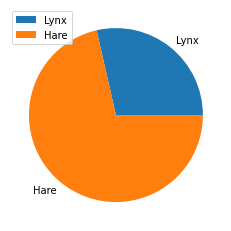

In [6]:
#задача 5
years = data[:,0]
hare = data[:,1]
lynx = data[:,2]
mask = hare > lynx
result = np.full(years.size, "L")
result[mask] = 'H'
print(result)
L = np.count_nonzero(result == 'L')
H = np.count_nonzero(result == 'H')
vals = [L, H]
plt.pie(vals, labels=['Lynx', 'Hare'])
plt.legend()
plt.show()

[False False False False False False False False False False False False
 False False False False False False False False False]


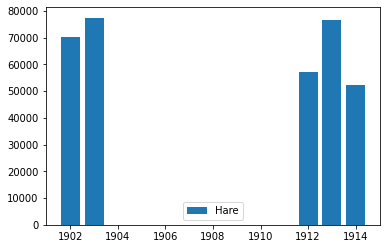

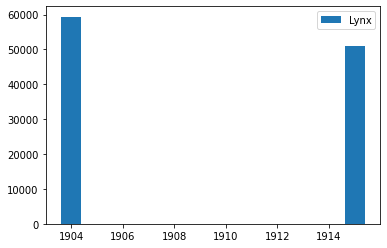

In [7]:
#задача 6
years = data[:,0]
hare = data[:,1]
lynx = data[:,2]
mask1 = hare > 50000
mask2 = lynx > 50000
mask = mask2 * mask1
print(mask)
plt.bar(years[mask1],hare[mask1], label='Hare')
plt.legend()
plt.show()
plt.bar(years[mask2],lynx[mask2], label='Lynx')
plt.legend()
plt.show()

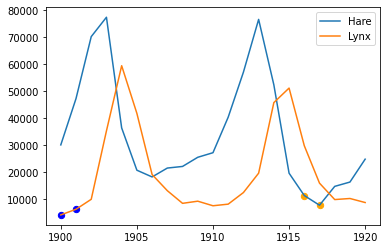

In [8]:
#задача 7
years = data[:,0]
hare = data[:,1]
lynx = data[:,2]
minh = np.argpartition(hare, 2)
minl = np.argpartition(lynx, 2)
mask1 = hare <= hare[minh[1]] 
mask2 = lynx <= lynx[minl[1]] 
plt.plot(years,hare, label='Hare')
plt.plot(years,lynx, label='Lynx')
plt.scatter(years[mask1],hare[mask1], color='orange', s=40, marker='o')
plt.scatter(years[mask2],lynx[mask2], color='blue', s=40, marker='o')
plt.legend()
plt.xticks(years[::5])
plt.show()

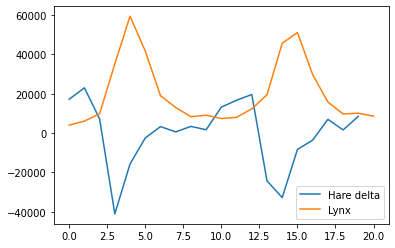

array([[ 1.        , -0.69334852],
       [-0.69334852,  1.        ]])

In [9]:
#задача 8
plt.plot(np.diff(data[:,1]), label='Hare delta')
plt.plot(data[:,2], label="Lynx")
plt.legend()
plt.show()
np.corrcoef(np.diff(data[:,1]),data[:-1,2])

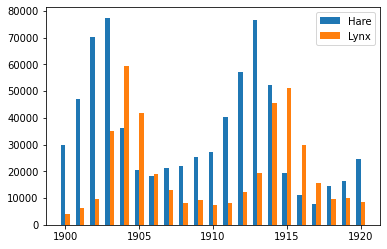

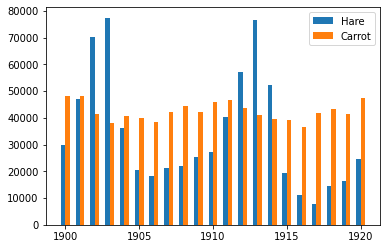

In [10]:
#задача 9
years = data[:,0]
plt.bar(years-0.15,data[:,1], label='Hare',width = 0.3)
plt.bar(years+0.15,data[:,2], label='Lynx',width = 0.3)
plt.legend()
plt.xticks(years[::5])
plt.show()
plt.bar(years-0.15,data[:,1], label='Hare',width = 0.3)
plt.bar(years+0.15,data[:,3], label='Carrot',width = 0.3)
plt.legend()
plt.xticks(years[::5])
plt.show()

In [11]:
#задача 10
years = data[:,0]
hare = data[:,1]
lynx = data[:,2]
r=np.corrcoef(np.diff(hare[:-1]),data[:-2,2])
lm=np.mean(lynx)
hm=np.mean(np.diff(hare[:-1]))
lS=np.std(lynx)
hS=np.std(np.diff(hare[:-1]))
h=hm+r[1][0]*lS*hS/(lynx[20]-lm)
print(h+hare[19])
print(hare[20])

31881.244031097216
24700.0


In [18]:
# БЛОК PCA. 
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
digits = fetch_openml('mnist_784')


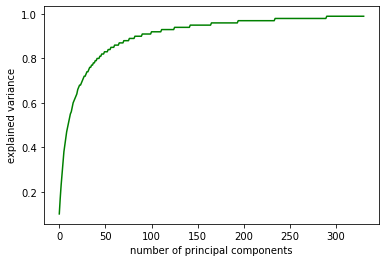

In [19]:
#задача 2
pca = PCA(n_components=0.99, svd_solver='full')
pca.fit_transform(digits.data.astype(float))
plt.plot(pca.explained_variance_ratio_.cumsum().round(2),c='g')
plt.xlabel('number of principal components')
plt.ylabel('explained variance')
plt.show()

In [20]:
#задача 3
pca = PCA(n_components=0.99, svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print('99% - ', X_transformed.shape[1])
pca = PCA(n_components=0.95, svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print('95% - ', X_transformed.shape[1])
pca = PCA(n_components=0.90, svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print('90% - ', X_transformed.shape[1])
pca = PCA(n_components=0.85, svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print('85% - ', X_transformed.shape[1])

99% -  331
95% -  154
90% -  87
85% -  59


In [21]:
images = digits.data.reshape(-1, 28, 28)

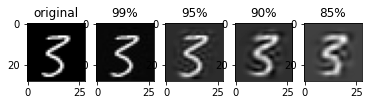

In [22]:
#задача 4
pca = PCA(n_components=0.99,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)

k = 540 # номер из примера дз
fig, ax = plt.subplots(1, 5)
ax[0].imshow(images[k], cmap='gray')
ax[1].imshow(X_restored[k].reshape(28, 28), cmap='gray')
ax[0].set_title('original')
ax[1].set_title('99%')

pca = PCA(n_components=0.95,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)
ax[2].imshow(X_restored[k].reshape(28, 28), cmap='gray')
ax[2].set_title('95%')

pca = PCA(n_components=0.9,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)
ax[3].imshow(X_restored[k].reshape(28, 28), cmap='gray')
ax[3].set_title('90%')

pca = PCA(n_components=0.85,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)
ax[4].imshow(X_restored[k].reshape(28, 28), cmap='gray')
ax[4].set_title('85%')
plt.show()